In [13]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_Central',skiprows=4)
df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2022 Solar Profile SPP rev.xlsx', sheet_name = '2019-2022_North',skiprows=4))
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])

### Resampling timestamp ###
df = df.groupby(by=["index_time"], dropna=False).mean()


### Making Per unit by Insatlled Capacity ###
installed_capacity = [
    34.2,
    126.126,
    73,
    52,
    128.396,
    133.92
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]

data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35065 entries, 2019-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BCPG-N[MCC_BCP-N(MW)]  35065 non-null  float64
 1   EAN-N[R4_EAN-N(MW)]    35065 non-null  float64
 2   NED-N[R1_NED-N(MW)]    35065 non-null  float64
 3   SSP-N[R1_SSP-N(MW)]    35065 non-null  float64
 4   EAL-N[R4_EAL-N(MW)]    35065 non-null  float64
 5   EAP-N[R4_EAP-N(MW)]    35065 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_16140\1049479550.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
C:\Users\595078\AppData\Local\Temp\ip

In [15]:
df = pd.DataFrame()
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = df.set_index('time_utcadj')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NED-N[R1_NED-N(MW)]    35064 non-null  float64
 1   BCPG-N[MCC_BCP-N(MW)]  35064 non-null  float64
 2   EAN-N[R4_EAN-N(MW)]    35064 non-null  float64
 3   EAL-N[R4_EAL-N(MW)]    35064 non-null  float64
 4   EAP-N[R4_EAP-N(MW)]    35064 non-null  float64
 5   SSP-N[R1_SSP-N(MW)]    35064 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_16140\1954018053.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  buffer_plantfactor['actual'].loc[n] = np.round(buffer_data_actual[n].sum() * 100 /len(buffer_data_actual),4)
C:\Users\595078\A

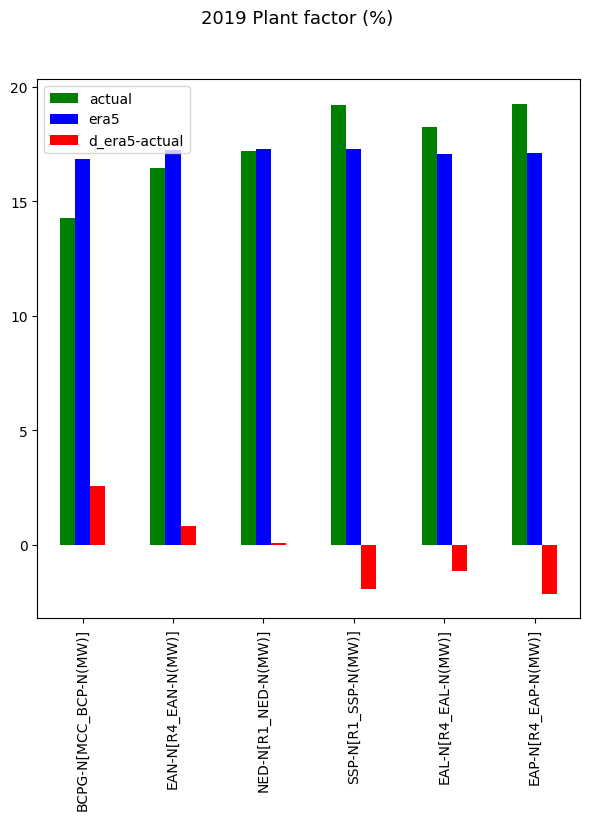

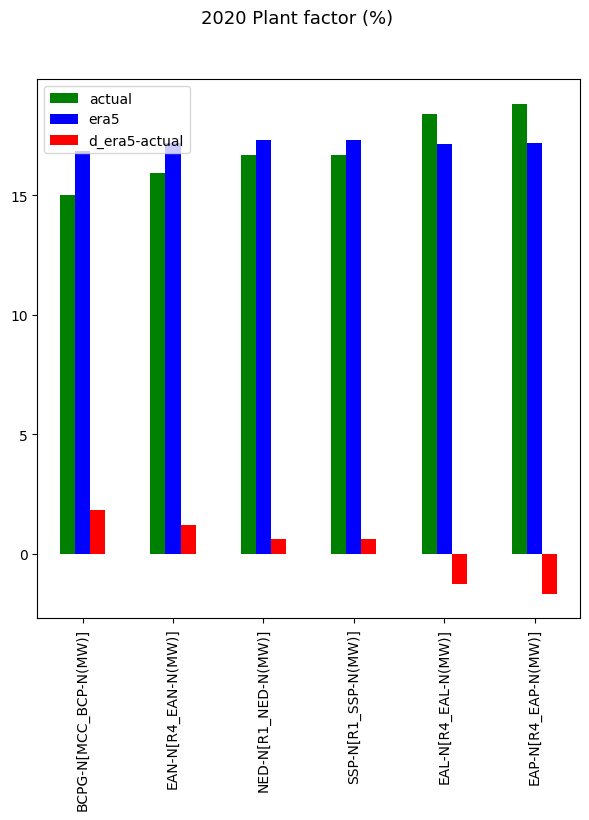

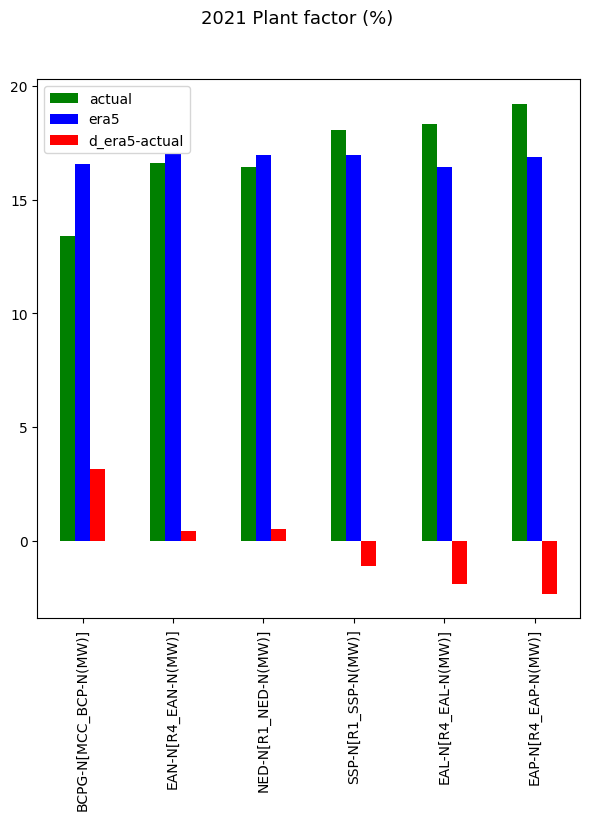

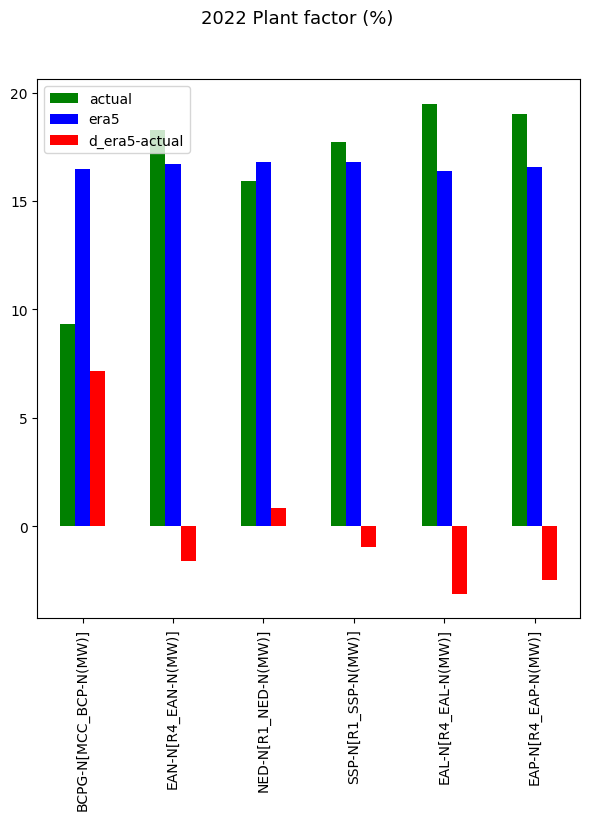

In [29]:
#### Annual Plant factor Comparison ###

year_list = [i for i in range(2019,2023,1)]
name_list = data_actual.columns

for y in year_list:

    buffer_df = df.loc[df.index.year == y]
    buffer_data_actual = data_actual.loc[data_actual.index.year == y]

    buffer_plantfactor = pd.DataFrame(index = name_list,columns=['actual','era5','d_era5-actual'])

    buffer_plantfactor = buffer_plantfactor.set_index(name_list,drop=True)

    for n in name_list:
        buffer_plantfactor['actual'].loc[n] = np.round(buffer_data_actual[n].sum() * 100 /len(buffer_data_actual),4)
        buffer_plantfactor['era5'].loc[n] = np.round(buffer_df[n].sum() * 100 /len(buffer_df),4)
    buffer_plantfactor['d_era5-actual'] = buffer_plantfactor['era5'] - buffer_plantfactor['actual']

    fig, ax = plt.subplots(figsize=(7,7))
    fig.suptitle(str(y) + " Plant factor (%) ", fontsize=13)
    buffer_plantfactor.plot.bar(ax = ax,color=['green','blue','red'])

In [ ]:
year_list = [i for i in range(2019,2023,1)]
name_list = data_actual.columns

for y in year_list:
     